**Load the Data and Libraries**

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

/var/folders/x8/m_rmpl596lxb3cysqszzjs0c0000gn/T/ipykernel_15043/2924896692.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
credits = pd.read_csv("tmdb_movie_metadata/tmdb_5000_credits.csv")
credits.rename(columns={'movie_id': 'id'}, inplace=True)
credits.drop("title", axis=1, inplace=True)
movies = pd.read_csv("tmdb_movie_metadata/tmdb_5000_movies.csv")
data = movies.merge(credits, on="id")

print(data.head)

<bound method NDFrame.head of          budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   1999

In [14]:
df = pd.DataFrame(data)

# Specify the filename
filename = 'output.xlsx'

# Write the DataFrame to an Excel file
df.to_excel(filename, index=False, engine='openpyxl')

print(f'DataFrame is written to {filename} successfully.')

DataFrame is written to output.xlsx successfully.


In [45]:
# Look at the correlation here 
def correlationHeatmap(X):
    # TODO - compute the correlation matrix here
    
    corr_matrix = X.corr()
    
    img = plt.matshow(
        corr_matrix, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1 
    )
    img.figure.set_size_inches( 10, 8 )
    img.axes.set_xticks(np.arange(corr_matrix.shape[1]), labels= list(corr_matrix.columns), rotation='vertical' )
    img.axes.set_yticks( np.arange(corr_matrix.shape[1]), labels=list(corr_matrix.index), rotation='horizontal' )
    img.figure.colorbar( img )
    img.axes.set_title("Correlation")
    

correlationHeatmap()

ValueError: could not convert string to float: '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [24]:
# Look at the runtime (done)
# Look at the revenue (y) (done)
# budget (done)
# popularity (done)
# the origin of the production (done)
# production companies --get back to this 
# genres (done)

In [39]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Function to parse genres and count their frequency
def parse(column):
    list = []
    for str in column:
        dict = json.loads(str)
        for genre in dict:
            list.append(genre['name'])
    return Counter(list)

# Create a bar chart for the genres frequency
def plot_frequency(counter, name):
    column_keys = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(10, 8))
    plt.bar(column_keys, counts, color='skyblue')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {name}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    
def plot_pie_chart(counter, name):
    
    labels = list(counter.keys())
    frequency = list(counter.values())
    plt.figure(figsize=(8, 8))
    plt.pie( frequency, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{name} Distribution')
    plt.show()

In [42]:
# production companies 
# prodcomp_counter = parse(data['production_companies'])
# prod_comp_name = "Production Companies"
# plot_pie_chart(prodcomp_counter,prod_comp_name)

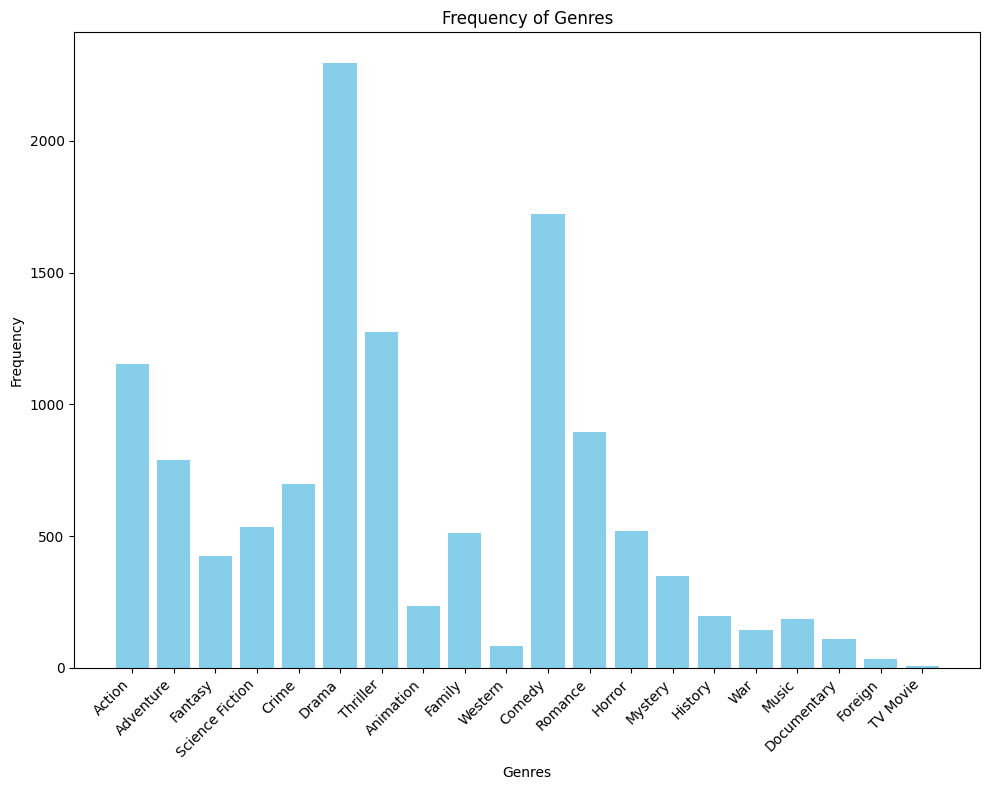

In [43]:
# genres 
genres_counter = parse(data['genres'])
genre_name = "Genres"
plot_frequency(genres_counter, genre_name)

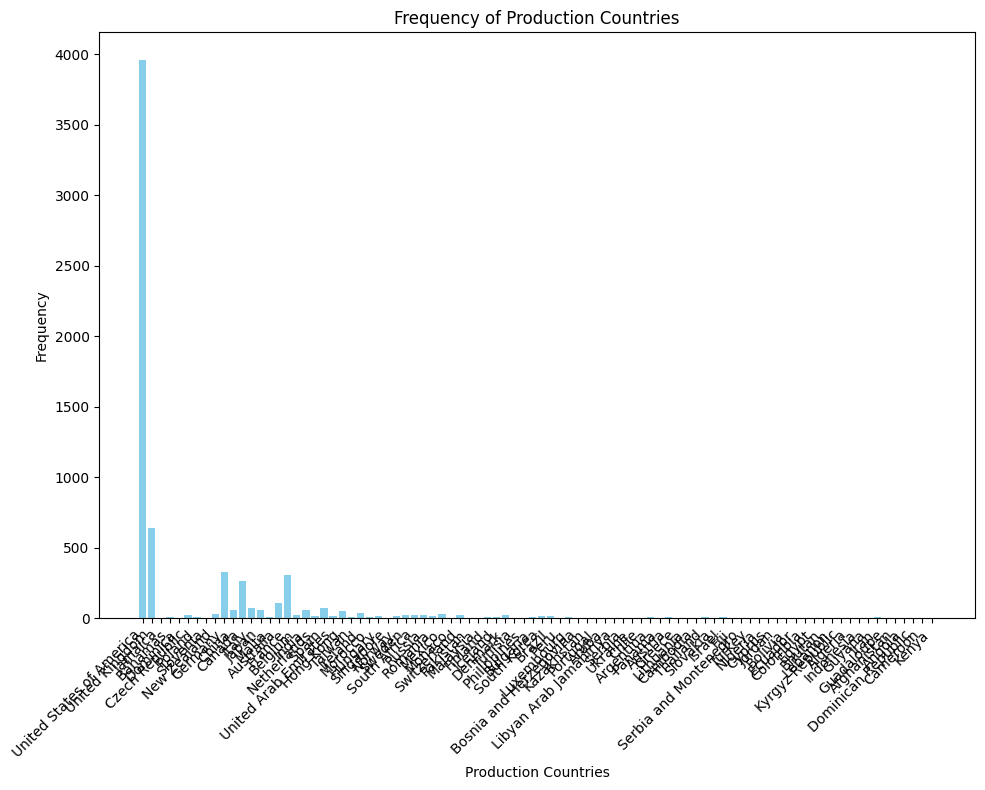

In [35]:
# Origin of the Production
production_countries_counter = parse(data['production_countries'])
pc_name = "Production Countries"
plot_frequency(production_countries_counter, pc_name)

(array([3.700e+01, 1.100e+01, 2.155e+03, 2.210e+03, 3.070e+02, 6.800e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  33.8,  67.6, 101.4, 135.2, 169. , 202.8, 236.6, 270.4,
        304.2, 338. ]),
 <BarContainer object of 10 artists>)

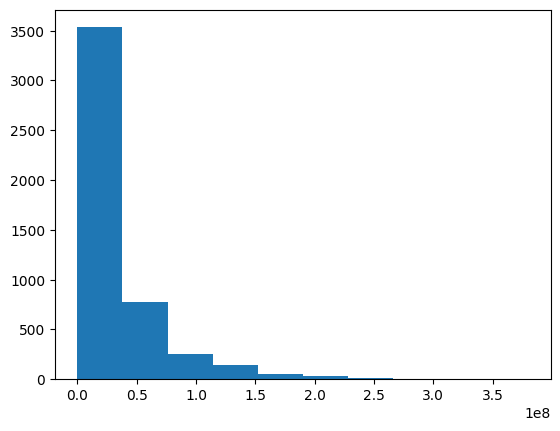

In [19]:
# look at the distributions of the above parameters 
plt.hist(df.budget)

(array([3.700e+01, 1.100e+01, 2.155e+03, 2.210e+03, 3.070e+02, 6.800e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  33.8,  67.6, 101.4, 135.2, 169. , 202.8, 236.6, 270.4,
        304.2, 338. ]),
 <BarContainer object of 10 artists>)

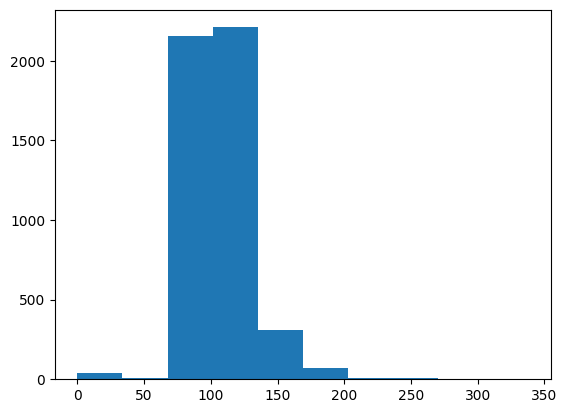

In [18]:
plt.hist(df.runtime)

(array([4.427e+03, 2.550e+02, 7.500e+01, 3.400e+01, 6.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 2.78796509e+08, 5.57593017e+08, 8.36389526e+08,
        1.11518603e+09, 1.39398254e+09, 1.67277905e+09, 1.95157556e+09,
        2.23037207e+09, 2.50916858e+09, 2.78796509e+09]),
 <BarContainer object of 10 artists>)

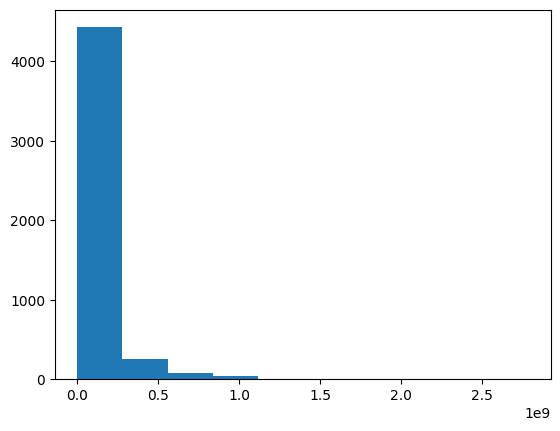

In [20]:
plt.hist(df.revenue)

(array([4.676e+03, 1.130e+02, 7.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0.       ,  87.5581305, 175.116261 , 262.6743915, 350.232522 ,
        437.7906525, 525.348783 , 612.9069135, 700.465044 , 788.0231745,
        875.581305 ]),
 <BarContainer object of 10 artists>)

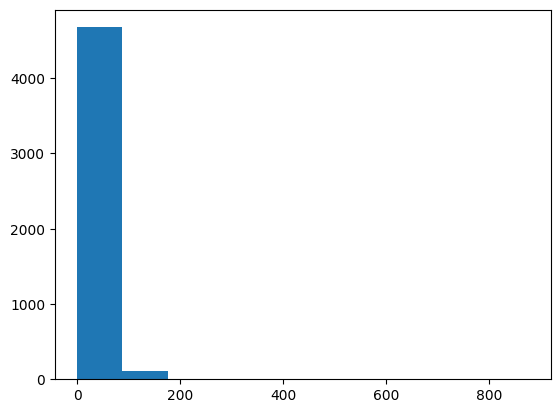

In [23]:
plt.hist(df.popularity)

In [ ]:
# try to fit a basic linear model with the above parameters 

# have to preprocess some of the parameters 